# Proyek Analisis Data: Bike Sharing Dataset
- **Nama:** Layyinatul Fuadah
- **Email:** layyinatul7@gmail.com
- **ID Dicoding:** https://www.dicoding.com/users/layyinatul_fuadah/academies

## Menentukan Pertanyaan Bisnis

- Musim apa yang paling banyak menyewakan sepeda?
- Pada tahun berapa permintaan penyewaan sepeda terbanyak dan terendah?

## Import Semua Packages/Library yang Digunakan

In [8]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## Data Wrangling

### Gathering Data

In [11]:
day_df = pd.read_csv('day.csv')

In [13]:
hour_df = pd.read_csv('hour.csv')

### Assessing Data

Assessing Data Hour

In [14]:
hour_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


In [17]:
hour_df.isna().sum()


instant       0
dteday        0
season        0
yr            0
mnth          0
hr            0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

In [18]:
hour_df.duplicated().sum()

0

In [19]:
hour_df.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1



Assessing Data Day

In [21]:
day_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


In [22]:
day_df.isna().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

In [23]:
day_df.duplicated().sum()

0

In [24]:
day_df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


### Cleaning Data

Pada bagian cleaning data menggunakan dropna untuk menemukan nilai kosong yang ada pada data, karena pada tahap sebelumnya tidak terdeteksi adanya kesalahan pada dataset, terutama tipe data.

In [20]:
day_df = day_df.dropna()
hour_df = hour_df.dropna()

## Exploratory Data Analysis (EDA)

### Explore ...

In [30]:
import pandas as pd

# Mengonversi kolom 'dteday' menjadi objek datetime
day_df['dteday'] = pd.to_datetime(day_df['dteday'])
hour_df['dteday'] = pd.to_datetime(hour_df['dteday'])

# Menggabungkan DataFrame menggunakan merge
main_df = day_df.merge(hour_df, on='dteday', how='left')

# Menampilkan lima baris pertama dari DataFrame hasil gabungan
(main_df.head())




,instant_x,dteday,season_x,yr_x,mnth_x,holiday_x,weekday_x,workingday_x,weathersit_x,temp_x,...,weekday_y,workingday_y,weathersit_y,temp_y,atemp_y,hum_y,windspeed_y,casual_y,registered_y,cnt_y
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,...,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,1,2011-01-01,1,0,1,0,6,0,2,0.344167,...,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,1,2011-01-01,1,0,1,0,6,0,2,0.344167,...,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,1,2011-01-01,1,0,1,0,6,0,2,0.344167,...,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,1,2011-01-01,1,0,1,0,6,0,2,0.344167,...,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


In [40]:
main_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 17379 entries, 0 to 17378
Data columns (total 32 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   instant_x     17379 non-null  int64         
 1   dteday        17379 non-null  datetime64[ns]
 2   season_x      17379 non-null  int64         
 3   yr_x          17379 non-null  int64         
 4   mnth_x        17379 non-null  int64         
 5   holiday_x     17379 non-null  int64         
 6   weekday_x     17379 non-null  int64         
 7   workingday_x  17379 non-null  int64         
 8   weathersit_x  17379 non-null  int64         
 9   temp_x        17379 non-null  float64       
 10  atemp_x       17379 non-null  float64       
 11  hum_x         17379 non-null  float64       
 12  windspeed_x   17379 non-null  float64       
 13  casual_x      17379 non-null  int64         
 14  registered_x  17379 non-null  int64         
 15  cnt_x         17379 non-null  int64 

In [34]:
day_df.describe(include="all")

<ipython-input-34-51e59b52191b>:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  day_df.describe(include="all")


,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
unique,NaN,731,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,2011-01-01 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
first,NaN,2011-01-01 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
last,NaN,2012-12-31 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,366.000000,NaN,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,NaN,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,NaN,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,NaN,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000


In [32]:
#hari
day_grouped = day_df.groupby(by=["weekday"]).agg({
    "instant": "nunique",
    "cnt": ["max", "min", "mean", "std"]
})

print(day_grouped)


        instant   cnt                                
        nunique   max   min         mean          std
weekday                                              
0           105  8227   605  4228.828571  1872.496629
1           105  7525    22  4338.123810  1793.074013
2           104  7767   683  4510.663462  1826.911642
3           104  8173   441  4548.538462  2038.095884
4           104  7804   431  4667.259615  1939.433317
5           104  8362  1167  4690.288462  1874.624870
6           105  8714   627  4550.542857  2196.693009


In [33]:
#Bulan
month_grouped = day_df.groupby(by="mnth").agg({
    "instant": "nunique",
    "cnt": ["max", "min", "mean", "std"]
})

print(month_grouped)


     instant   cnt                                
     nunique   max   min         mean          std
mnth                                              
1         62  4521   431  2176.338710  1161.674370
2         57  5062  1005  2655.298246  1145.313307
3         62  8362   605  3692.258065  1899.301812
4         60  7460   795  4484.900000  1776.160778
5         62  8294  2633  5349.774194  1298.711561
6         60  8120  3767  5772.366667  1240.400031
7         62  8173  3285  5563.677419  1273.751871
8         62  7865  1115  5664.419355  1494.516146
9         60  8714  1842  5766.516667  1810.130649
10        62  8156    22  5199.225806  1988.392517
11        60  6852  1495  4247.183333  1285.712709
12        62  6606   441  3403.806452  1549.639353


In [37]:
#Musim
season_grouped = day_df.groupby(by="season").agg({
    "instant": "nunique",
    "cnt": ["max", "min", "mean", "std"]
})

print(season_grouped)


       instant   cnt                                
       nunique   max   min         mean          std
season                                              
1          181  7836   431  2604.132597  1399.942119
2          184  8362   795  4992.331522  1695.977235
3          188  8714  1115  5644.303191  1459.800381
4          178  8555    22  4728.162921  1699.615261


In [38]:
hour_df.describe(include="all")

<ipython-input-38-55b8ff84265d>:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  hour_df.describe(include="all")


,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
unique,NaN,731,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,2011-01-01 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,24,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
first,NaN,2011-01-01 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
last,NaN,2012-12-31 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,8690.0000,NaN,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,NaN,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,NaN,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,NaN,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000


In [39]:
#jam
hour_grouped = hour_df.groupby("hr").agg({
    "instant": "nunique",
    "cnt": ["max", "min", "mean", "std"]
})

print(hour_grouped)


   instant  cnt                            
   nunique  max min        mean         std
hr                                         
0      726  283   2   53.898072   42.307910
1      724  168   1   33.375691   33.538727
2      715  132   1   22.869930   26.578642
3      697   79   1   11.727403   13.239190
4      697   28   1    6.352941    4.143818
5      717   66   1   19.889819   13.200765
6      725  213   1   76.044138   55.084348
7      727  596   1  212.064649  161.441936
8      727  839   5  359.011004  235.189285
9      727  426  14  219.309491   93.703458
10     727  539   8  173.668501  102.205413
11     727  663  10  208.143054  127.495536
12     728  776   3  253.315934  145.081134
13     729  760  11  253.661180  148.107657
14     729  750  12  240.949246  147.271574
15     729  750   7  251.233196  144.632541
16     730  783  11  311.983562  148.682618
17     730  976  15  461.452055  232.656611
18     728  977  23  425.510989  224.639304
19     728  743  11  311.523352 

## Visualization & Explanatory Analysis

### Pertanyaan 1: Musim apa yang paling banyak menyewakan sepeda?

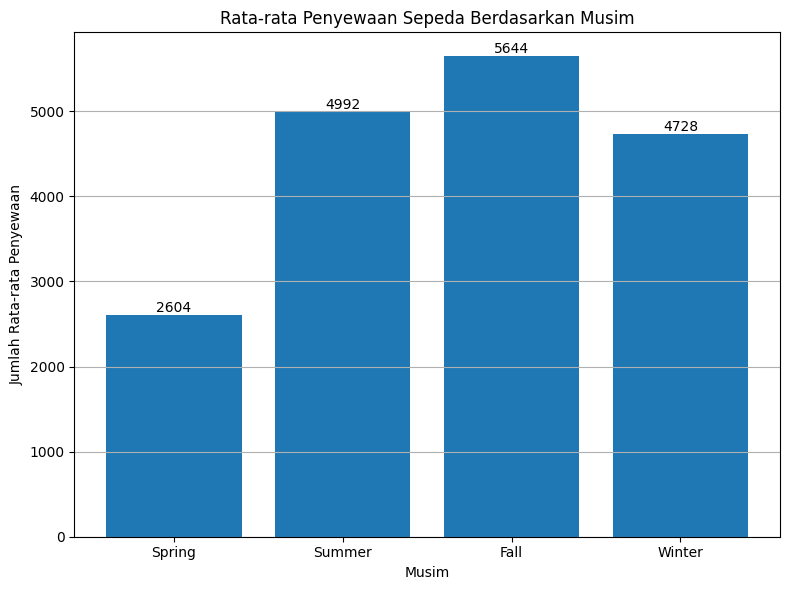

In [44]:
# Membuat agregasi musiman
seasonal_agg = day_df.groupby("season").agg({
    "instant": "nunique",  # Jumlah unik dari instant untuk setiap musim
    "cnt": ["mean"]         # Rata-rata dari cnt untuk setiap musim
})

# Mengatur ulang indeks agar kolom season menjadi kolom biasa
seasonal_agg = seasonal_agg.reset_index()

# Mengganti angka musim dengan nama musim
seasonal_agg["season"] = ["Spring", "Summer", "Fall", "Winter"]

# Menyiapkan plot
plt.figure(figsize=(8, 6))

# Membuat bar plot
plt.bar(seasonal_agg["season"],          # Menggunakan nama musim sebagai sumbu x
        seasonal_agg[("cnt", "mean")])   # Menggunakan rata-rata cnt sebagai sumbu y

# Menambahkan label pada setiap bar
for i in range(len(seasonal_agg["season"])):
    plt.text(i, seasonal_agg[("cnt", "mean")][i], # Menambahkan teks dengan nilai cnt
             str(int(seasonal_agg[("cnt", "mean")][i])), # Mengonversi nilai cnt menjadi string
             ha="center", va="bottom") # Posisi teks pada bar

# Menambahkan judul dan label sumbu
plt.title("Rata-rata Penyewaan Sepeda Berdasarkan Musim")
plt.xlabel("Musim")
plt.ylabel("Jumlah Rata-rata Penyewaan")

# Menampilkan grid
plt.grid(axis="y")

# Mengatur tata letak agar plot terlihat rapi
plt.tight_layout()

# Menampilkan plot
plt.show()



### Pertanyaan 2: Pada tahun berapa permintaan penyewaan sepeda terbanyak dan terendah ?

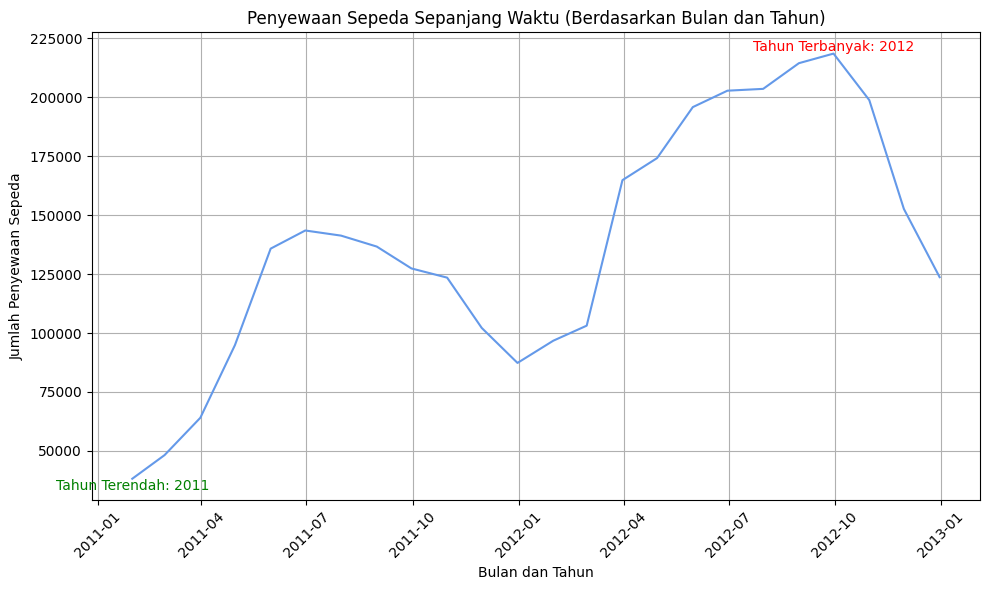

In [52]:
import matplotlib.pyplot as plt

# Mengelompokkan data harian menjadi data bulanan dan menghitung total penyewaan sepeda setiap bulan
monthly_df = day_df.resample('M', on='dteday').sum()

# Mencari tahun dengan jumlah penyewaan sepeda terbanyak
tahun_terbanyak = monthly_df['cnt'].idxmax().year

# Mencari tahun dengan jumlah penyewaan sepeda terendah
tahun_terendah = monthly_df['cnt'].idxmin().year

# Menampilkan visualisasi
plt.figure(figsize=(10, 6))
plt.plot(monthly_df.index, monthly_df['cnt'], color='#6499E9')
plt.xlabel('Bulan dan Tahun')
plt.ylabel('Jumlah')
plt.title('Berdasarkan Bulan dan Tahun')
plt.xticks(rotation=45)
plt.grid(True)

# Menambahkan label untuk tahun dengan jumlah penyewaan sepeda terbanyak
plt.text(monthly_df['cnt'].idxmax(), monthly_df['cnt'].max(), f'Tahun Terbanyak: {tahun_terbanyak}', ha='center', va='bottom', color='red')

# Menambahkan label untuk tahun dengan jumlah penyewaan sepeda terendah
plt.text(monthly_df['cnt'].idxmin(), monthly_df['cnt'].min(), f'Tahun Terendah: {tahun_terendah}', ha='center', va='top', color='green')

plt.tight_layout()
plt.show()


## Conclusion

- Conclution pertanyaan 1 : Berdasarkan grafik pata pertanyaan satu dapat diketahui bahwa orang - orang lebih suka menyewa sepeda pada saat musim gugur
- Conclution pertanyaan 2 : Berdasarkan grafik diatas peminat penyewaan sepeda terbanyak pada tahun 2012 dan paling sedikit pada tahun 2011